# DataFrame.plot

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
sns.set()

まずはデータの作成

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["label"] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

### 折れ線グラフ

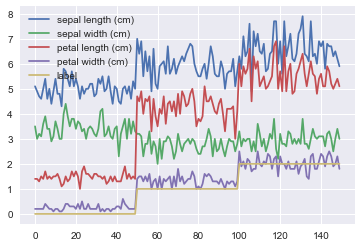

In [3]:
df.plot()

### 散布図

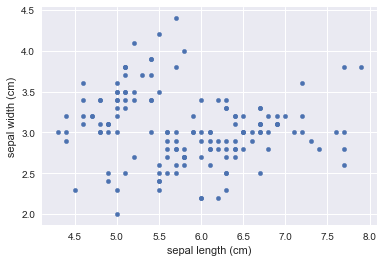

In [4]:
df.plot(kind="scatter", x=0, y=1)

#### クラスごとに色を変えてみましょう

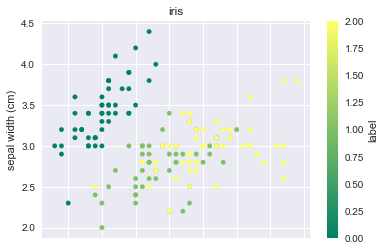

In [5]:
df.plot(
    kind="scatter",  # グラフの種類を指定
    x=0,             # x軸に対応する列の番号か列名
    y=1,             # y軸に対応する列の番号か列名
    c="label",       # 点の色を指定する列の番号か列名
    cmap="summer",   # 色合いの指定
    title="iris"     # プロットのタイトル
)

### 棒グラフ

可視化を簡単にするために、ここでdf["label"]を変更しています。

In [6]:
df2 = df.copy()
df2["label"] = [iris.target_names[i] for i in iris.target]
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    label  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

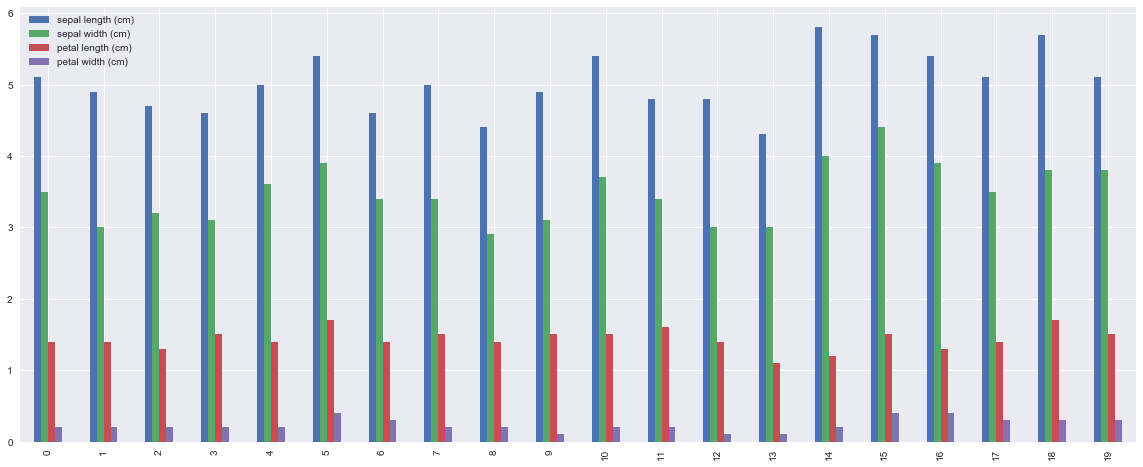

In [7]:
df2[:20].plot(kind="bar", figsize=(20,8))

#### 特徴ごとにsubplotで別のプロットにしてみます

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000180952295C0>,
      dtype=object)

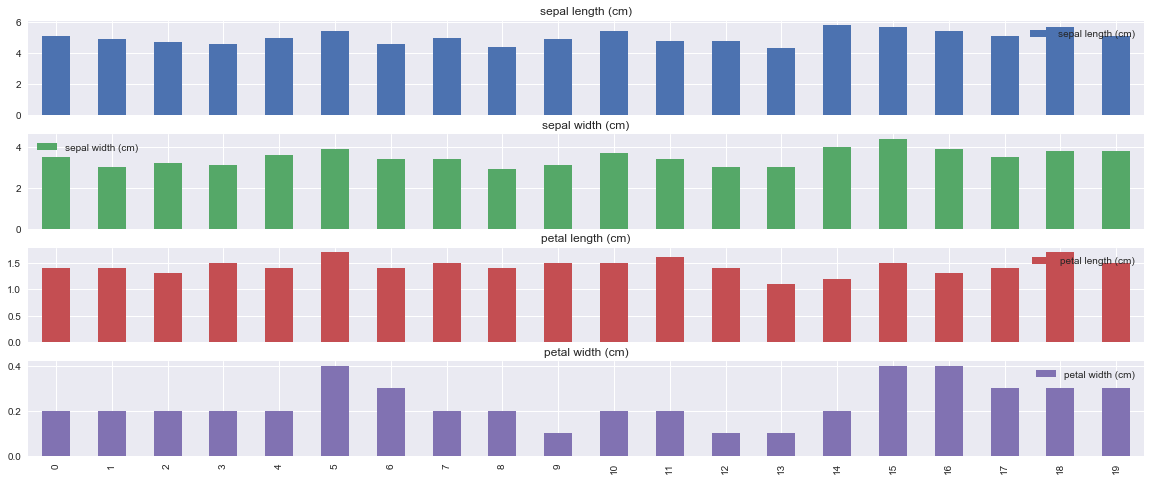

In [8]:
df2[:20].plot(kind="bar", figsize=(20,8), subplots=True)

#### subplotsのlayoutを変えてみます。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018095511940>,
      dtype=object)

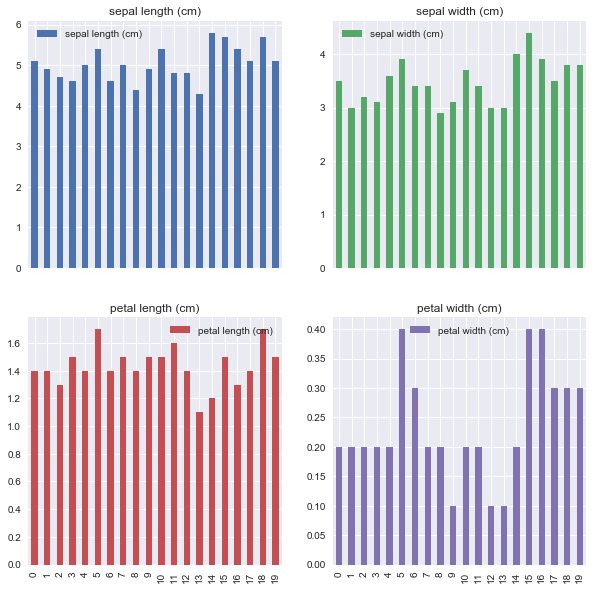

In [9]:
df2[:20].plot(        # データ数が多いので上から20個だけ使います
    kind="bar",       # グラフ種類
    figsize=(10,10),  # グラフのサイズを指定します。
    subplots=True,    # Trueにするとグラフが要素ごとに別々に描画されます。
    layout=(2,2)      # グラフのlayoutを指定します。グラフの数を考慮してください。
)

### ヒストグラム

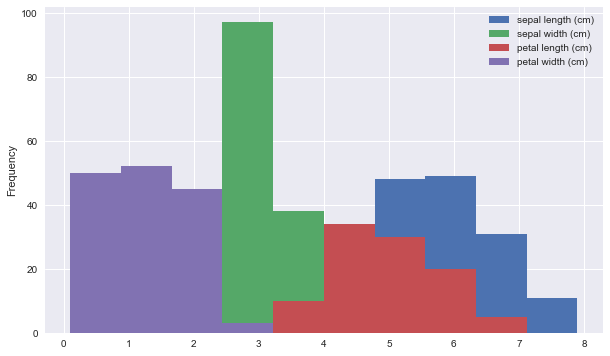

In [10]:
df2.plot(kind="hist", figsize=(10,6))

#### 透過率alphaを変えてみましょう。

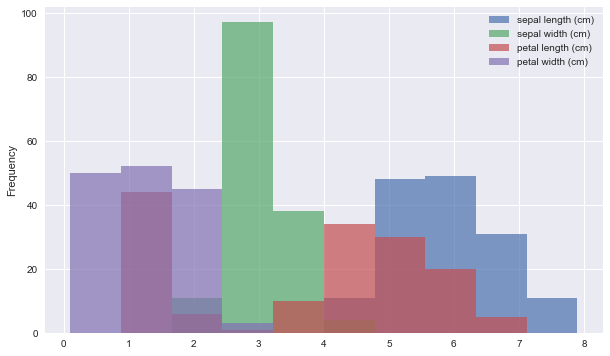

In [11]:
df2.plot(
    kind="hist",       # グラフの種類
    figsize=(10,6),    # プロットのサイズ（お好みで）
    alpha=0.7          # 透過させる場合は適当な数字を指定しましょう。
)

### 箱ひげ図

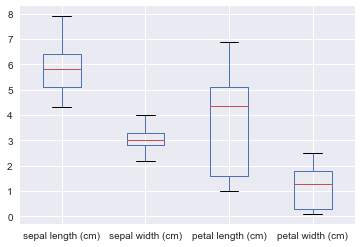

In [12]:
df2.plot(kind="box")

### この他にplotで使えるkind

help(df.plot)で確認ができます。

kind

 |          - 'line' : line plot (default)  
 |          - 'bar' : vertical bar plot  
 |          - 'barh' : horizontal bar plot  
 |          - 'hist' : histogram  
 |          - 'box' : boxplot  
 |          - 'kde' : Kernel Density Estimation plot  
 |          - 'density' : same as 'kde'  
 |          - 'area' : area plot  
 |          - 'pie' : pie plot  
 |          - 'scatter' : scatter plot  
 |          - 'hexbin' : hexbin plot  

### 発展

matplotlibと組み合わせると、下のようなプロットも作れます。

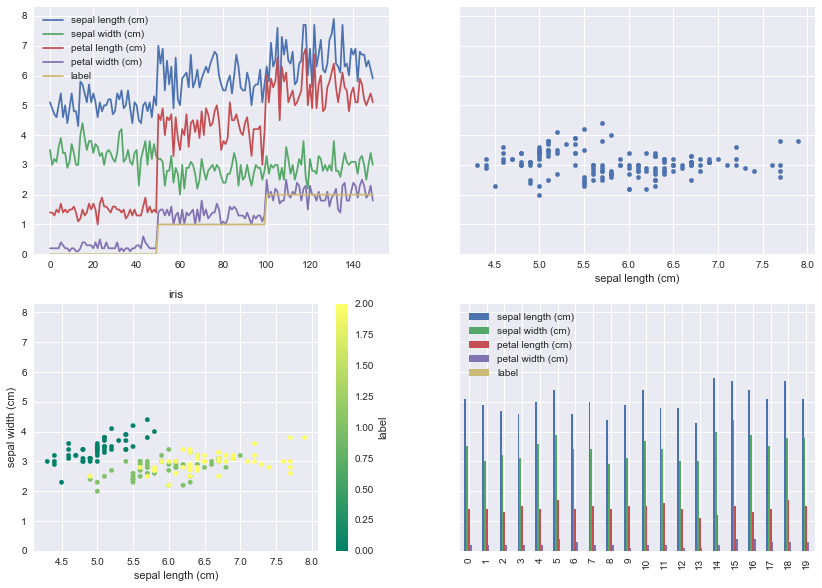

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
df.plot(ax=axes.flatten()[0])
df.plot(kind="scatter", x=0, y=1,ax=axes.flatten()[1])
df.plot(
    kind="scatter", 
    x=0, 
    y=1, 
    c="label", 
    cmap="summer", 
    title="iris",ax=axes.flatten()[2]
)
df[:20].plot(kind="bar",ax=axes.flatten()[3])